In [15]:
import numpy as np
import matplotlib.pyplot as plt
#define constants
alpha, beta = 1, 40
T_ambient, T_desired, T_start = 20, 37, 25

# system update by discretization of the differential eq.
def next_temp(u, T, dt):
    print(u)
    print(T)
    return T+alpha*(T_ambient-T)*dt + beta * u *dt

def simulate_temp(controller, num_steps=20):
    dt = 0.1 # Every time interval dt we set a new control value
    T = T_start
    T_list = [T]
    for k in range(num_steps):
        # ask controller for u value
        u = controller.get_control(T,dt)
        # device only allows to set u between 0 and 1:
        u = np.clip(u, 0, 1)
        # simulate what the temperature will be after time interval dt
        T = next_temp(u, T, dt)
        T_list.append(T)
    time = dt*np.arange(num_steps+1)
    plt.plot(time, np.repeat(T_desired, num_steps+1), ls="--")
    plt.plot(time, T_list)
    plt.xlabel("time"); plt.ylabel("Temperature");

1.0
25
1.0
28.5
1.0
31.65
0.5030000000000001
34.485
0.3903000000000006
35.0485
0.3790300000000002
35.10485
0.3779030000000006
35.110485
0.3777903000000009
35.111048499999995
0.3777790300000007
35.11110485
0.3777779029999991
35.111110485000005
0.3777777903000001
35.1111110485
0.37777777903000076
35.111111104849996
0.37777777790299893
35.111111110485005
0.37777777779029975
35.1111111110485
0.37777777777903054
35.11111111110485
0.37777777777790367
35.11111111111048
0.37777777777779
35.11111111111105
0.3777777777777786
35.11111111111111
0.3777777777777786
35.11111111111111
0.3777777777777786
35.11111111111111


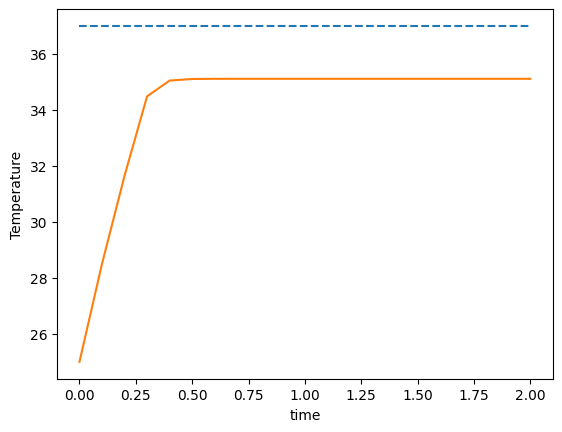

In [16]:
class PController:
    def __init__(self, Kp, set_point):
        self.Kp = Kp
        self.set_point = set_point
    
    def get_control(self, measurement, dt):
        error = self.set_point - measurement
        #print(self.Kp * error)
        return self.Kp * error
    
    
p_controller = PController(Kp=0.2, set_point=T_desired)
simulate_temp(p_controller)